In [26]:
import numpy as np
import sep
# additional setup for reading the test image and displaying plots
import matplotlib.pyplot as plt
from matplotlib import rcParams
import astropy.io.fits

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [27]:
data = astropy.io.fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

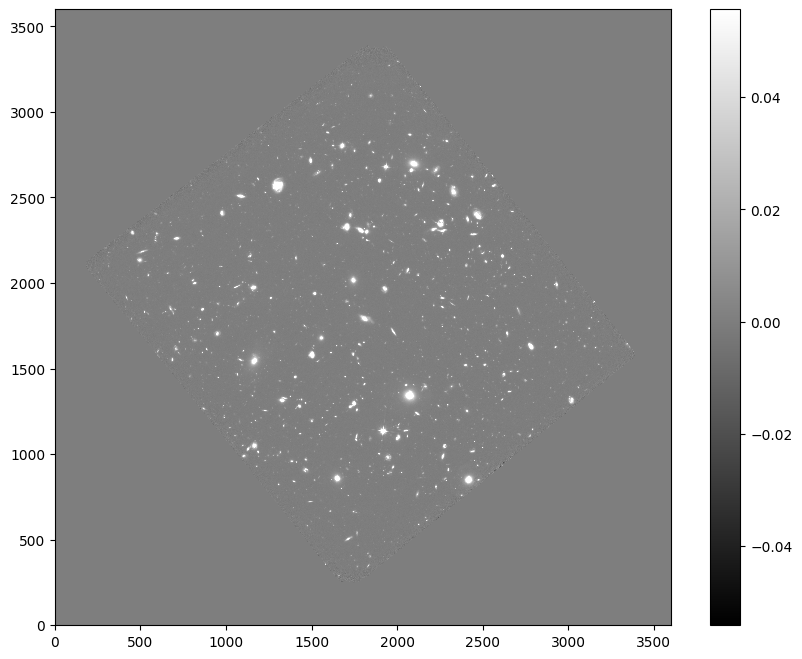

In [28]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [29]:
# measure a spatially varying background on the image
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [30]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [31]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

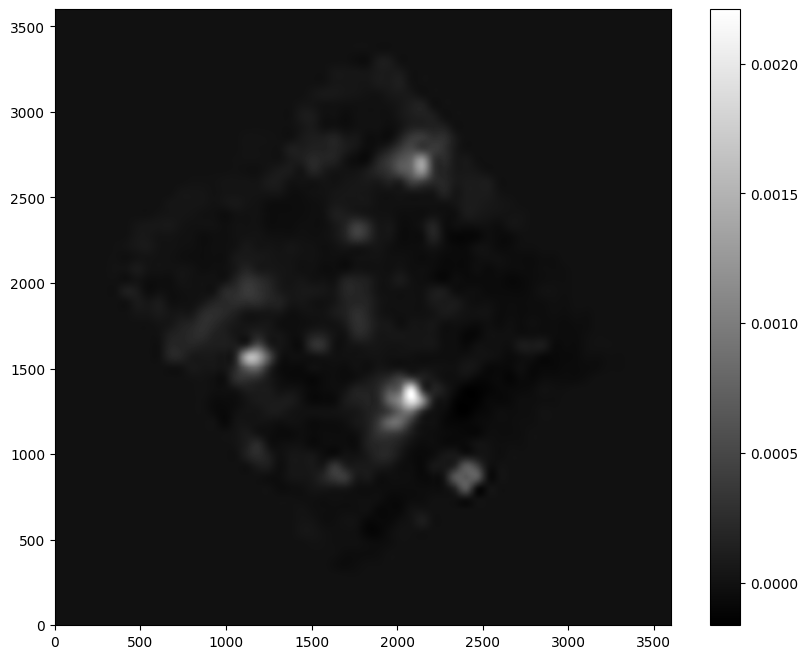

In [32]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [33]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

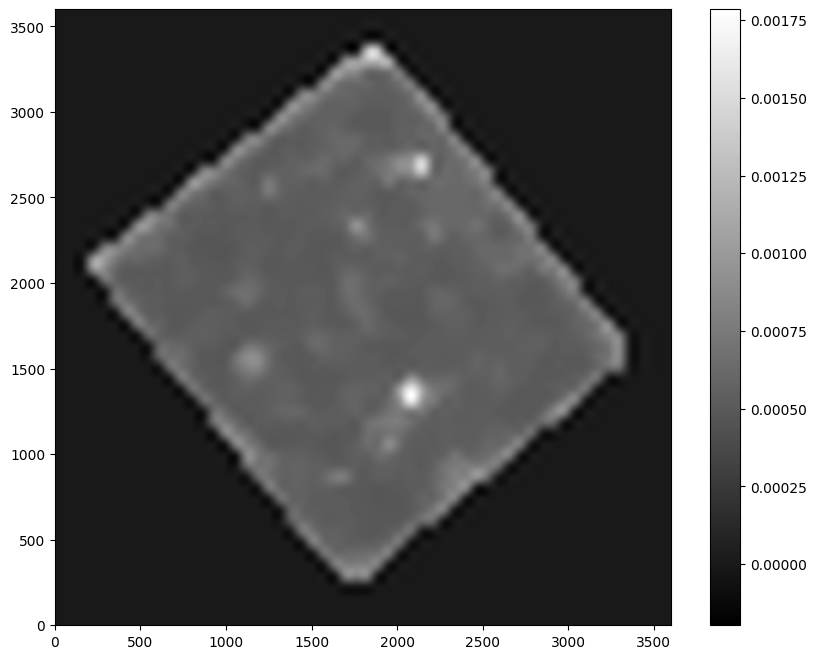

In [34]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [35]:
# subtract the background
data_sub = data - bkg


In [36]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [37]:
# how many objects were detected
len(objects)

8643

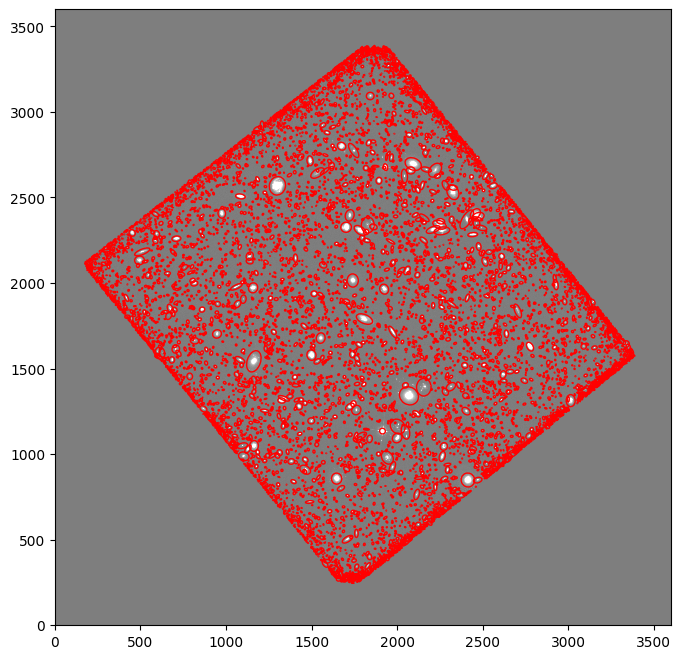

In [38]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [39]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [40]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [41]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


/tmp/ipykernel_28817/3286892789.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(flux), bins=100)


(array([  1.,   2.,   0.,   1.,   0.,   1.,   1.,   0.,   3.,   0.,   1.,
          3.,   3.,   4.,   6.,   7.,   7.,   8.,   7.,   9.,   9.,  11.,
         15.,  15.,  26.,  40.,  48.,  66.,  77., 131., 207., 312., 452.,
        590., 744., 788., 704., 565., 499., 423., 330., 250., 217., 204.,
        190., 154., 156., 120., 106., 112.,  96.,  87.,  78.,  64.,  47.,
         56.,  53.,  56.,  44.,  33.,  32.,  21.,  29.,  29.,  22.,  20.,
         13.,  10.,  11.,  11.,   8.,   7.,   2.,   0.,   1.,   0.,   2.,
          1.,   3.,   1.,   2.,   1.,   2.,   1.,   1.,   3.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-4.07816913, -4.0083171 , -3.93846508, -3.86861305, -3.79876102,
        -3.728909  , -3.65905697, -3.58920495, -3.51935292, -3.44950089,
        -3.37964887, -3.30979684, -3.23994481, -3.17009279, -3.10024076,
        -3.03038874, -2.96053671, -2.89068468, -2.82083266, -2.75098063,
        -2.6811286 , -2.61

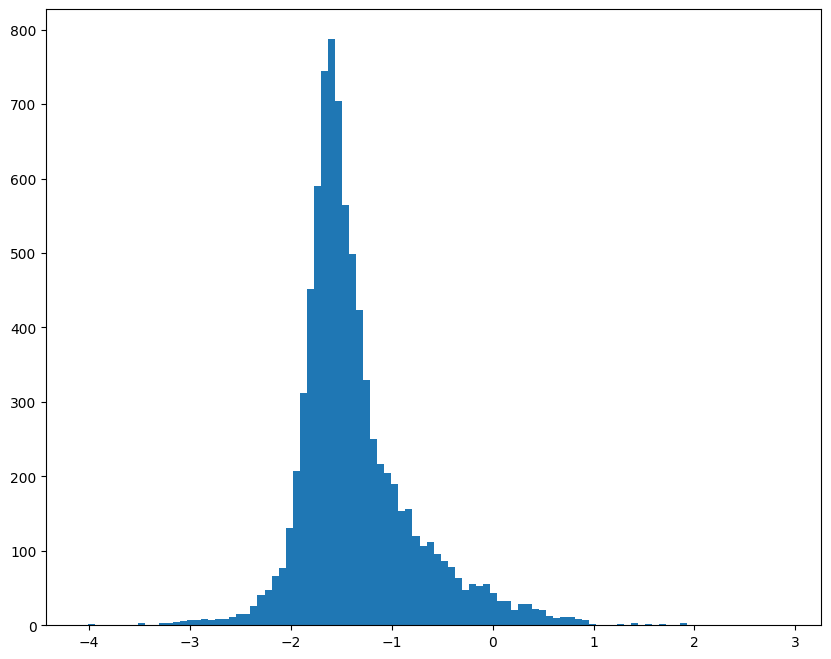

In [42]:
plt.hist(np.log10(flux), bins=100)

806.9355369473226
Mean of the flux distribution: 0.3617466258281149
Median of the flux distribution: 0.030954822942148894
Standard deviation of the flux distribution: 9.241925555851745
87.27334855135173 deviations away from the mean.


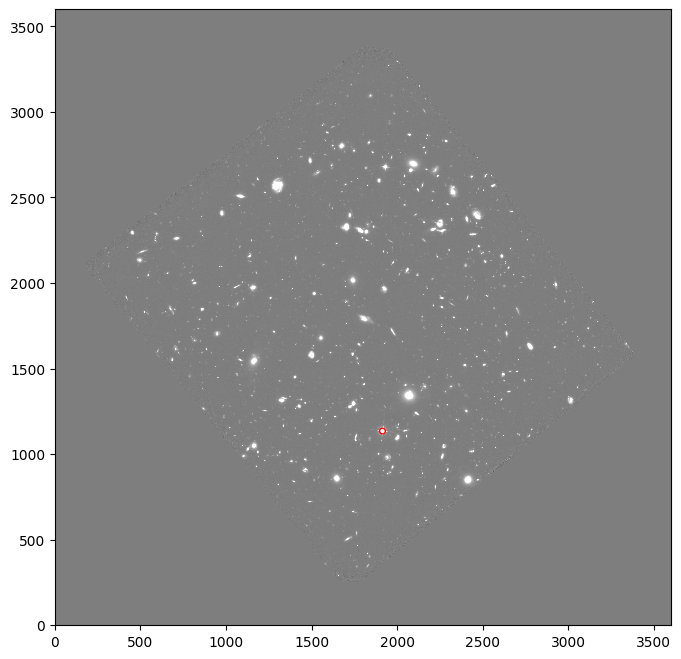

In [43]:
flux_array = np.array(flux)
flux_mean = np.mean(flux)
flux_std = np.std(flux)
flux_median = np.median(flux)

outlier = flux_array - flux_mean

np.argmax(outlier)

print(outlier[2059])

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

e = Ellipse(xy=(objects['x'][2059], objects['y'][2059]),
                width=6*objects['a'][2059],
                height=6*objects['b'][2059],
                angle=objects['theta'][2059] * 180. / np.pi)
e.set_facecolor('none')
e.set_edgecolor('red')
ax.add_artist(e)


print(f"Mean of the flux distribution: {flux_mean}")
print(f"Median of the flux distribution: {flux_median}")
print(f"Standard deviation of the flux distribution: {flux_std}")
print(f"{(outlier[2059] - flux_mean) / flux_std} deviations away from the mean.")

In [46]:
from astropy.io import fits
fdata_f105w = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdata_f125w = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdata_f160w = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

hdu_2 = fits.open(fdata_f105w)
hdu_3 = fits.open(fdata_f125w)
hdu_4 = fits.open(fdata_f160w)

data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data

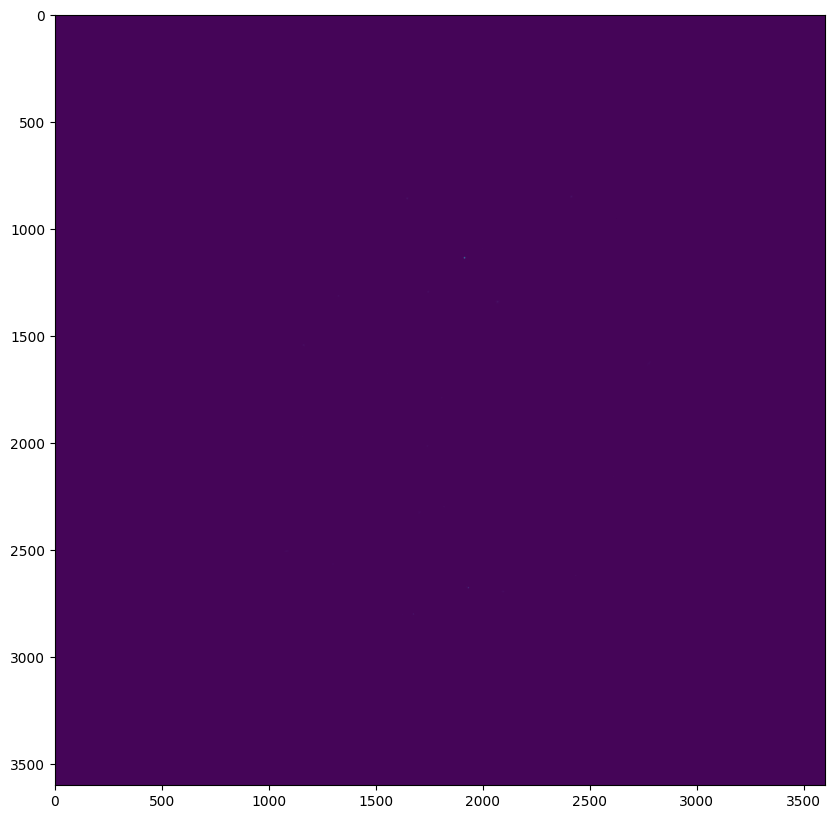

In [47]:
f = plt.figure(figsize=(10,10))
plt.imshow(data_2)

In [56]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp, vpmin, vpmax

In [57]:
def fits_quicklook(data, fnx=10, fny=10):
    f = plt.figure(figsize=(fnx, fny))
    pdata_tmp, vpmin, vpmax = rescale_image(data)
    plt.imshow(pdata_tmp, vmin=vpmin, vmax=vpmax)

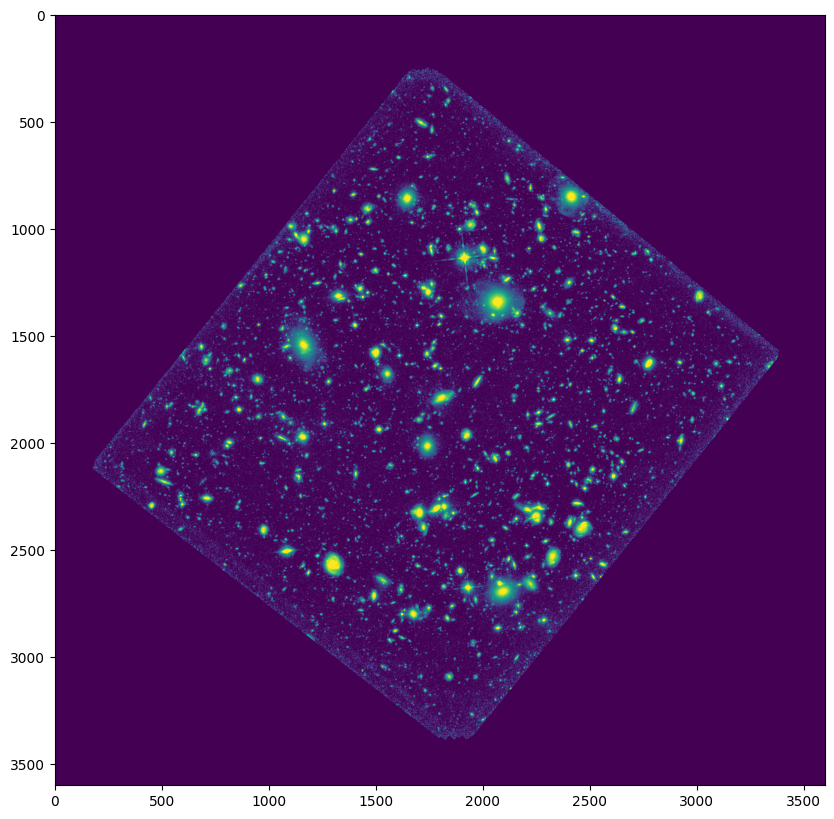

In [58]:
fits_quicklook(data_2)

In [59]:
#Making 3-color image
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max = rescale_image(data_3)
data_4_res, d4min, d4max = rescale_image(data_4)

In [60]:
#Limit data between max and min
data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d3min] = d3min
data_3_res[data_3_res>d3max] = d3max
data_4_res[data_4_res<d4min] = d4min
data_4_res[data_4_res>d4max] = d4max

In [61]:
#Create rgb image
rgb = np.zeros((data_2_res.shape[0], data_2_res.shape[1], 3))
rgb[:,:,0] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1] = (data_3_res-d3min)/(d3max-d3min)
rgb[:,:,2] = (data_4_res-d4min)/(d4max-d4min)

[W 2024-12-10 17:07:54,656.656 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


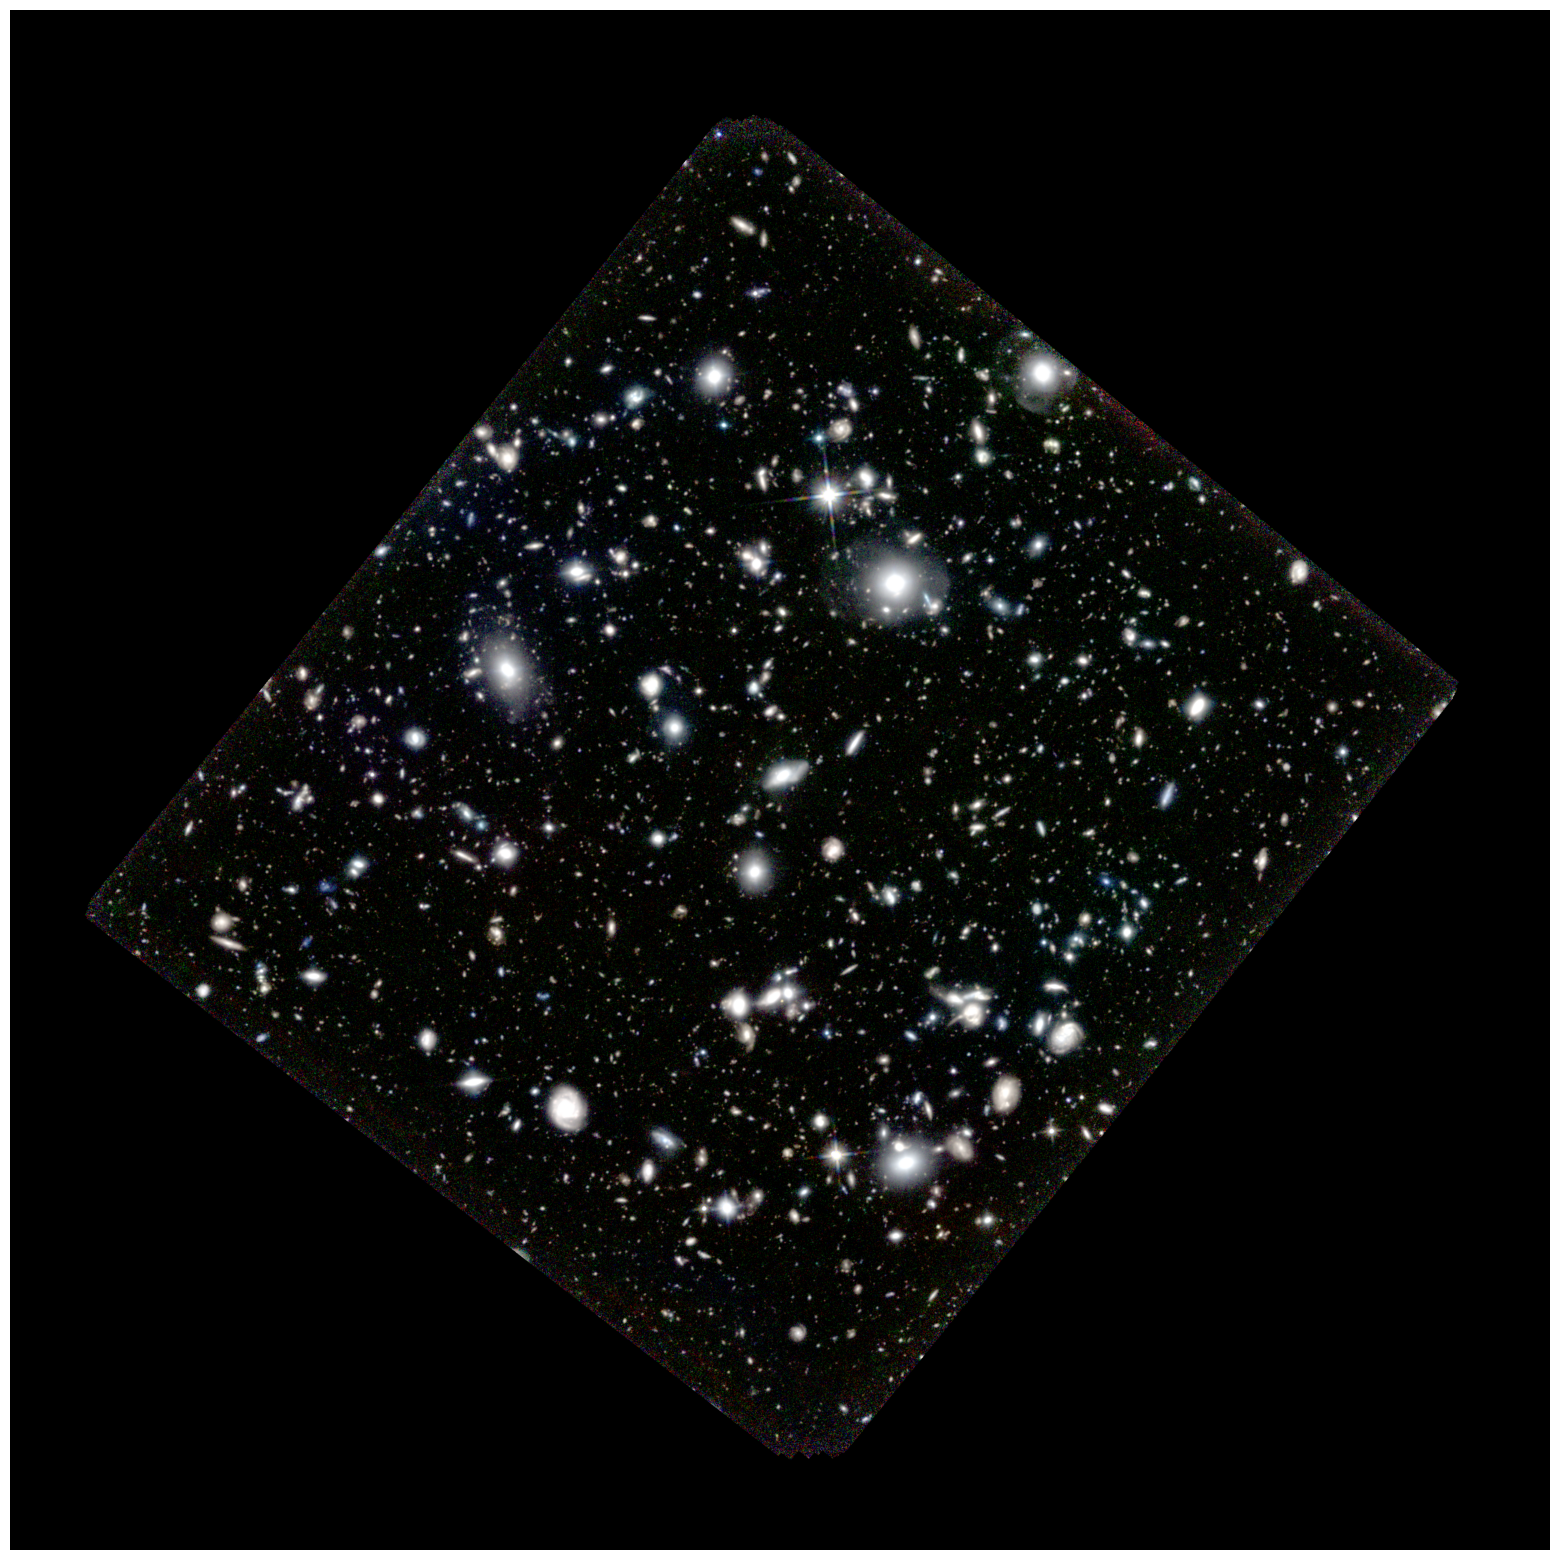

In [64]:
#Plot rgb image and save as a PNG
f,ax = plt.subplots(1, 1, figsize=(20, 20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('astr19finalRGB.png', bbox_inches='tight', pad_inches=0, dpi=600)